<a href="https://colab.research.google.com/github/csipop/TAREAS_MASTER/blob/main/Trabajo_1_limpieza_datos_bmw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importamos las librerias y leemos el archivo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder

In [58]:
df_bmw = pd.read_csv("/content/drive/MyDrive/Trabajos Master/Trabajo_1_Limpieza_de_datos/bmw_pricing_v3 (1).csv")

#Vista inicial de los datos

In [59]:
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [60]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [61]:
df_bmw.columns

Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta'],
      dtype='object')

In [62]:
df_bmw.describe().round(2)

,km,potencia,precio
count,4841.00,4842.00,4837.00
mean,140959.35,128.98,15831.92
std,60208.53,38.99,9222.63
min,-64.00,0.00,100.00
25%,102884.00,100.00,10800.00
50%,141080.00,120.00,14200.00
75%,175217.00,135.00,18600.00
max,1000376.00,423.00,178500.00


In [63]:
df_bmw.shape

(4843, 18)

Vemos que en la columna km hay un valor negativo el cual es imposible para esta variable

In [64]:
df_bmw.sort_values("km").head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,NaN,640 Gran Coupé,-64.0,230.0,NaN,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01
2409,NaN,420 Gran Coupé,476.0,120.0,NaN,diesel,blue,hatchback,True,True,False,NaN,False,True,True,True,30300.0,2018-08-01
4372,NaN,X5,612.0,183.0,2016-10-01,diesel,black,suv,True,True,False,NaN,False,False,True,True,49100.0,2018-06-01
3935,BMW,X5,706.0,155.0,2017-07-01,diesel,black,suv,True,True,False,NaN,True,True,True,NaN,41600.0,2018-02-01
3687,NaN,116,2399.0,85.0,NaN,diesel,white,subcompact,False,False,False,NaN,False,False,True,False,17300.0,2018-03-01


Como solo es un valor decidimos eliminarlo, ya que ademas contiene valores nulos en otras variables.

In [65]:
df_bmw = df_bmw.drop(2938)

In [66]:
df_bmw.describe().round(2)

,km,potencia,precio
count,4840.00,4841.00,4836.00
mean,140988.48,128.96,15819.69
std,60180.61,38.97,9184.24
min,476.00,0.00,100.00
25%,102928.25,100.00,10800.00
50%,141084.50,120.00,14200.00
75%,175221.50,135.00,18600.00
max,1000376.00,423.00,178500.00


##Nulos

In [67]:
df_bmw.isnull().sum()

,0
marca,969
modelo,3
km,2
potencia,1
fecha_registro,2422
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486


Vemos que tenemos varios valores nulos, más adelante vamos a decidir que hacer con ellos

##Duplicados

In [68]:
df_bmw[df_bmw.duplicated]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [69]:
df_bmw[df_bmw.duplicated].shape

(0, 18)

No tenemos valores duplicados

#Variables de Fecha

Hay dos variables de fecha las cuales su Dtype es un objeto " fecha_registro" y "fecha_venta" vamos a convertirlas en variables de typo datatime

In [70]:
df_bmw1 = df_bmw.copy()

In [71]:
for i in ["fecha_registro", "fecha_venta"]:
  df_bmw1[i] = pd.to_datetime(df_bmw1[i])

In [72]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4839 non-null   object        
 2   km                           4840 non-null   float64       
 3   potencia                     4841 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4837 non-null   object        
 6   color                        4397 non-null   object        
 7   tipo_coche                   3382 non-null   object        
 8   volante_regulable            4838 non-null   object        
 9   aire_acondicionado           4356 non-null   object        
 10  camara_trasera               4840 non-null   object        
 11  asientos_traseros_plegables  1452 non-null   obj

#Variables objeto a booleano

Vemos que en nuestro df hay muchas variables que son boleanas pero tienen el tipo de objeto. Para solucionarlo vamos a convertir estas variables en booleanas

In [73]:
for i in ["volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", "alerta_lim_velocidad"]:
  df_bmw1[i] = df_bmw1[i].astype(bool)

In [74]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4839 non-null   object        
 2   km                           4840 non-null   float64       
 3   potencia                     4841 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4837 non-null   object        
 6   color                        4397 non-null   object        
 7   tipo_coche                   3382 non-null   object        
 8   volante_regulable            4842 non-null   bool          
 9   aire_acondicionado           4842 non-null   bool          
 10  camara_trasera               4842 non-null   bool          
 11  asientos_traseros_plegables  4842 non-null   boo

#Análisis de las variables nulas

Como hemos visto tenemos muchas variables nulas,por lo que aquí las vamos a análizar y decidir que hacer en cada variable

In [75]:
df_bmw1.isnull().sum()/(df_bmw1.shape[0])*100

,0
marca,20.012392
modelo,0.061958
km,0.041305
potencia,0.020653
fecha_registro,50.020653
tipo_gasolina,0.103263
color,9.190417
tipo_coche,30.152829
volante_regulable,0.000000
aire_acondicionado,0.000000


##Variable marca

In [76]:
df_bmw1[df_bmw1["marca"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2018-01-01
8,NaN,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,True,True,False,6200.0,2018-03-01
11,NaN,325,228000.0,145.0,NaT,diesel,black,NaN,True,True,False,False,True,False,True,True,13300.0,2018-03-01
18,NaN,325,205474.0,145.0,2009-05-01,diesel,NaN,NaN,True,True,False,True,True,True,True,True,11000.0,2018-04-01
21,NaN,218,24868.0,100.0,NaT,petrol,grey,convertible,False,True,False,True,False,True,True,True,31000.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,NaN,220 Active Tourer,153358.0,140.0,2015-06-01,diesel,grey,van,False,True,False,True,False,False,True,True,11700.0,2018-02-01
4807,NaN,218 Active Tourer,197276.0,112.0,NaT,diesel,white,van,True,True,False,True,False,True,True,True,13100.0,2018-02-01
4825,NaN,225 Active Tourer,33300.0,170.0,NaT,petrol,NaN,van,True,True,False,True,False,False,False,True,19200.0,2018-05-01
4834,NaN,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,NaN,False,True,False,True,False,False,True,True,14900.0,2018-07-01


Sabemos que solo puede haber una marca ya que estamos analizando un df de bmw, por lo que como esta variable contiene nulos y no aportara nada a nuestro modelo de predicción decidimos eliminarla

In [77]:
del(df_bmw1["marca"])

##Variable modelo

In [78]:
df_bmw1[df_bmw1["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaT,diesel,black,NaN,False,True,False,True,False,True,True,True,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaT,diesel,white,NaN,False,False,False,True,False,False,False,False,800.0,2018-03-01


En este caso nos encontramos con 3 valores nulos, como no podemos determinar que modelo es y esta variable puede ser util para nuestro modelo decidimos eliminar los valores nulos

In [79]:
df_bmw1.dropna(subset=["modelo"], inplace=True)

##Variable km

In [80]:
df_bmw1[df_bmw1["km"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,NaT,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


Vemos que hay dos valores nulos, lo que podemos hacer para solucionarlo es sustituir estos dos valores por la media

In [81]:
df_bmw1["km"].fillna(df_bmw1["km"].mean(),inplace=True)

##Variable potencia

In [82]:
df_bmw1[df_bmw1["potencia"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,True,False,False,True,True,18700.0,2018-03-01


Vemos que solo hay una variable con nulos, decidimos sustituir el valor nulo por la media

In [83]:
df_bmw1["potencia"].fillna(df_bmw1["potencia"].mean(),inplace=True)

##Variable fecha_registro

In [84]:
df_bmw1[df_bmw1["fecha_registro"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,False,True,True,True,True,True,12400.0,2018-02-01
8,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,True,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,NaN,False,True,False,True,False,False,True,True,14900.0,2018-07-01
4835,218 Active Tourer,165707.0,110.0,NaT,diesel,black,van,False,True,False,True,False,True,True,True,13600.0,2018-07-01
4837,218 Gran Tourer,66770.0,110.0,NaT,diesel,blue,van,False,True,False,True,False,False,True,False,13400.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,NaN,False,True,False,True,False,False,True,False,14600.0,2018-08-01


<Axes: >

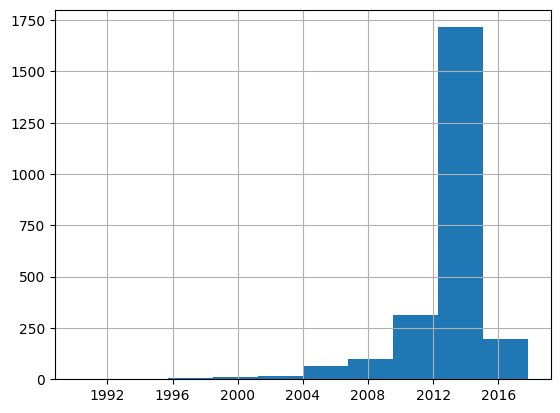

In [85]:
df_bmw1["fecha_registro"].hist()

In [86]:
df_bmw1["fecha_registro"].describe()

,fecha_registro
count,2419
mean,2012-12-06 03:42:38.247209728
min,1990-03-01 00:00:00
25%,2012-07-01 00:00:00
50%,2013-07-01 00:00:00
75%,2014-04-01 00:00:00
max,2017-11-01 00:00:00


En este caso observamos que hay muchos valores nulos (la mitad de nuestro dataset) como eliminar tantas variables no es buena idea y vemos que la mayoria de datos en las variables sin numero se concentran en un espacio de tiempo pequeño, decidimos usar la media para sustituir los nulos de estas variables.

In [87]:
df_bmw1["fecha_registro"].fillna(df_bmw1["fecha_registro"].mean(),inplace=True)

In [88]:
df_bmw1["fecha_registro"].describe()

,fecha_registro
count,4839
mean,2012-12-06 03:42:38.247209472
min,1990-03-01 00:00:00
25%,2012-12-06 03:42:38.247209728
50%,2012-12-06 03:42:38.247209728
75%,2013-07-01 00:00:00
max,2017-11-01 00:00:00


Observamos que este cambio no ha alterado mucho nuestro dataset

##Variable tipo_gasolina

In [105]:
df_bmw1[df_bmw1["tipo_gasolina"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2012-12-06 03:42:38.247209728,NaN,black,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01 00:00:00.000000000,NaN,white,False,False,False,True,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01 00:00:00.000000000,NaN,black,True,True,False,True,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2012-12-06 03:42:38.247209728,NaN,white,False,True,False,True,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,2014-11-01 00:00:00.000000000,NaN,white,False,True,False,True,False,False,False,True,100.0,2018-03-01


En este caso vamos a sustituir los nulos por la moda

In [109]:
df_bmw1["tipo_gasolina"].fillna(df_bmw1["tipo_gasolina"].mode()[0],inplace=True)

##Variable color

In [103]:
df_bmw1[df_bmw1["color"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,2009-01-01 00:00:00.000000000,diesel,NaN,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,2009-05-01 00:00:00.000000000,diesel,NaN,True,True,False,True,True,True,True,True,11000.0,2018-04-01
25,318,196092.0,85.0,1995-10-01 00:00:00.000000000,petrol,NaN,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,2012-12-06 03:42:38.247209728,petrol,NaN,True,False,False,False,False,True,True,True,2400.0,2018-06-01
47,420,20996.0,135.0,2014-05-01 00:00:00.000000000,petrol,NaN,True,False,False,True,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,X4,61989.0,140.0,2014-12-01 00:00:00.000000000,diesel,NaN,False,False,False,True,False,True,False,True,28600.0,2018-09-01
4777,X5,285669.0,173.0,2007-08-01 00:00:00.000000000,diesel,NaN,True,True,False,True,True,False,True,True,9300.0,2018-09-01
4805,218 Active Tourer,35382.0,110.0,2012-12-06 03:42:38.247209728,diesel,NaN,False,True,False,True,False,True,True,True,13100.0,2018-02-01
4818,X3,110039.0,130.0,2009-07-01 00:00:00.000000000,diesel,NaN,False,True,False,True,False,False,True,False,1300.0,2018-05-01


Sustituimos los nulos por la moda

In [110]:
df_bmw1["color"].fillna(df_bmw1["color"].mode()[0],inplace=True)

##Variable tipo_coche

In [93]:
df_bmw1[df_bmw1["tipo_coche"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,NaN,False,False,False,True,True,False,True,False,10200.0,2018-02-01
4,425,97097.0,160.0,2012-12-06 03:42:38.247209728,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
11,325,228000.0,145.0,2012-12-06 03:42:38.247209728,diesel,black,NaN,True,True,False,False,True,False,True,True,13300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,216 Gran Tourer,48012.0,85.0,2016-02-01 00:00:00.000000000,diesel,blue,NaN,True,True,False,False,False,True,True,True,15600.0,2018-06-01
4834,218 Gran Tourer,47782.0,110.0,2012-12-06 03:42:38.247209728,diesel,blue,NaN,False,True,False,True,False,False,True,True,14900.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,2012-12-06 03:42:38.247209728,diesel,black,NaN,False,True,False,True,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01 00:00:00.000000000,diesel,grey,NaN,False,True,False,True,False,False,True,True,17500.0,2018-08-01


<Axes: >

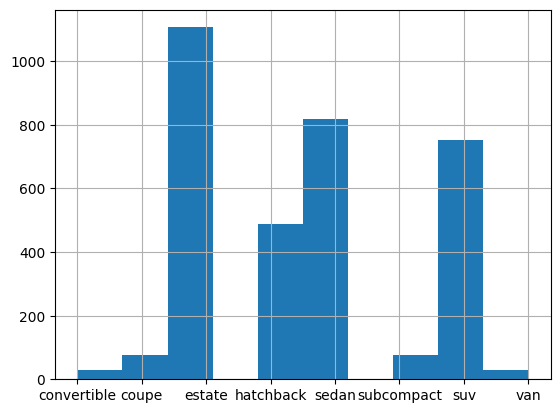

In [94]:
df_bmw1["tipo_coche"].hist()

In [95]:
df_bmw1["tipo_coche"].mode()

,tipo_coche
0,estate


En este caso vamos a eliminar la variable "tipo_coche" porque tiene muchos valores nulos y su distribución no es normal por lo que usar la moda u otros metodos solo alteriaria nuestra predicción y tampoco es una variable que nos aporte mucho.

In [96]:
del(df_bmw1["tipo_coche"])

##Variable precio

In [98]:
df_bmw1[df_bmw1["precio"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,2013-11-01 00:00:00.000000000,diesel,NaN,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,520,163803.0,135.0,2012-12-06 03:42:38.247209728,diesel,grey,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,316,34489.0,85.0,2012-12-06 03:42:38.247209728,diesel,black,True,False,False,True,False,False,True,False,NaN,2018-02-01
549,318,157129.0,100.0,2012-12-06 03:42:38.247209728,diesel,blue,True,True,True,False,True,False,True,True,NaN,2018-03-01
569,320,166866.0,120.0,2012-12-06 03:42:38.247209728,diesel,blue,True,True,False,True,True,True,True,True,NaN,2018-03-01
584,320,114771.0,135.0,2012-12-06 03:42:38.247209728,diesel,blue,False,True,False,True,False,False,True,False,NaN,2018-03-01


En este caso como el precio es nuestra variable target lo mejor es que eliminemos los nulos ya que son pocos valores y sustituirlos por la media podria afectar a nuestra predicción

In [99]:
df_bmw1.dropna(subset=["precio"], inplace=True)

##Variable fecha_venta

In [100]:
df_bmw1[df_bmw1["fecha_venta"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
594,525,269290.0,120.0,2012-12-06 03:42:38.247209728,diesel,silver,True,False,True,True,False,False,True,True,4200.0,NaT


Como solo es un valor el nulo lo vamos a eliminar

In [101]:
df_bmw1.dropna(subset=["fecha_venta"], inplace=True)

In [111]:
df_bmw1.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0
asientos_traseros_plegables,0
